In [5]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn import tree

In [6]:
df=pd.read_csv('salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [7]:
df['salary_more_then_100k'].value_counts()

1    10
0     6
Name: salary_more_then_100k, dtype: int64

In [8]:
df.isna().sum()

company                  0
job                      0
degree                   0
salary_more_then_100k    0
dtype: int64

In [9]:
le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()

In [10]:
df['company']=le_company.fit_transform(df['company'])
df['job']=le_job.fit_transform(df['job'])
df['degree']=le_degree.fit_transform(df['degree'])


In [11]:
df

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


In [12]:
X=df.drop('salary_more_then_100k',axis='columns')
X

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [13]:
y=df.salary_more_then_100k
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=100)

In [15]:
model=DecisionTreeClassifier()

In [16]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [17]:
predictions=model.predict(X_test)
predictions

array([1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [18]:
cm=confusion_matrix(y_test,predictions)
cm

array([[1, 1],
       [3, 3]], dtype=int64)

<AxesSubplot:>

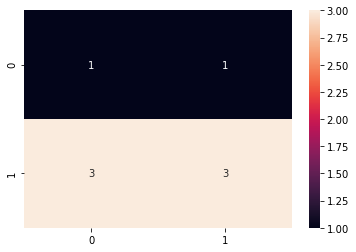

In [19]:
sns.heatmap(cm,annot=True)


In [20]:
model.score(X_test,y_test)

0.5

In [21]:
accuracy_score(y_test,predictions)

0.5

In [22]:
f1_score(y_test,predictions)

0.6

In [23]:
recall_score(y_test,predictions)

0.5

In [24]:
precision_score(y_test,predictions)

0.75

In [25]:
model.predict([[2,2,1]])

array([1], dtype=int64)